# 911 Calls Project
___

<a href='https://github.com/pick1'> <img src='fireengine.jpg' /></a>

For this project I analyzed some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Import numpy and pandas for data analysis; seaborn and matplotlib data visualization. **

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

** Import csv to dataframe and check first 5 rows. **

In [2]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Checking the format of the columns. **

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Questions

** What are the 5 most common zipcodes where 911 calls originate? **

In [23]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [24]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** What are the 5 most common title codes? **

In [4]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

** How many unique title codes are there? **

In [5]:
df['title'].nunique()

110

## Creating new features

** In the 'title' column the description shows "Department : Type". The departments are EMS, Fire and Traffic. I will create a new column with a custom lambda expression to slice the "Department" and add it to a new column called "Department."**

In [6]:
df['Department'] = df['title'].apply(lambda x: x.split(':')[0])
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic


** From the new 'Department' column what are the most common departments called? **

In [7]:
df['Department'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

** Using seaborn and a countplot we can see our 911 calls by department. **

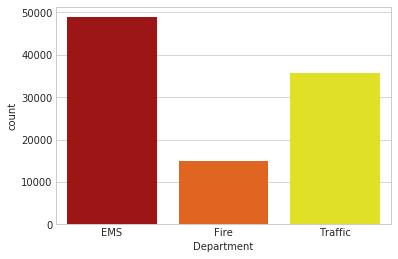

In [42]:
sns.countplot(x=df['Department'],data =df, palette = 'hot')
sns.set_style("whitegrid")

___
## Time Series Data

** What is the format of the data in the 'timeStamp' column? **

In [24]:
type(df['timeStamp'].iloc[0])

str

** Since the data in the 'timeStamp' column is in 'str' we need to convert the column from strings to DateTime objects. **

In [25]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Checking to make sure the 'timeStamp' strings have been converted.**

In [26]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

** Another way to transform the time data is to break it down into years, months, days-of-week, and hours. By creating 4 new columns we will be able to look deeper into the time data.**

In [27]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Year'] = df['timeStamp'].apply(lambda time: time.year)

** Making sure our new columns populated correctly. **

In [29]:
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Month,Day,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015


** Since our days are in number format i.e. 0:Mon., 1:Tues etc... Mapping 'Day' values to their actual names will make the data easier to see down the line. **

In [30]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].map(dmap)
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Month,Day,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015


** Which days and which departments are busiest by day of the week? **

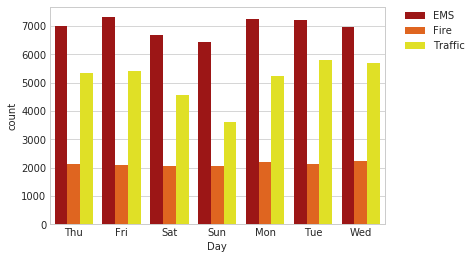

In [108]:
sns.countplot(x=df['Day'], hue=df['Department'],palette = 'hot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

** Which days and which departments are busiest by month? **

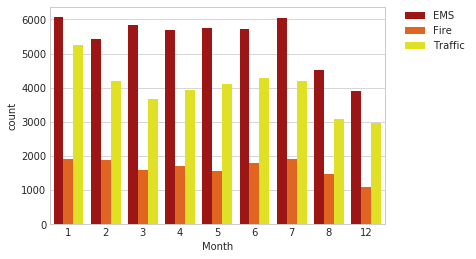

In [107]:
sns.countplot(x=df['Month'], hue=df['Department'], palette ='hot')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

**It seems our data is missing data for months September, October and November**

_____

** If we display it a different way we may be able to get a better picture of what's happening for the months that are not showing. **

** Using the  [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) function and a new object called dfMonth, we can create a new dataFrame that has the months for an index. **

In [36]:
dfMonth = df.groupby('Month').count()
dfMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Day,Year
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** Using one of the features from the 'dfMonth' object we can make a simple plot showing the count of calls per month. **

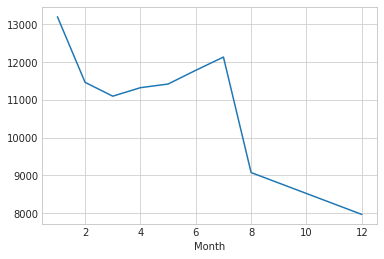

In [106]:
dfMonth['lat'].plot();

** Using seaborn's lmplot() we can create linear fit on the number of calls per month. **

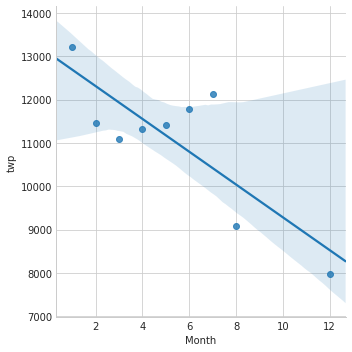

In [105]:
sns.lmplot(x='Month',y='twp',data=dfMonth.reset_index());

**Creating a new column 'Date' which has the date from the 'timeStamp' column will allow us to do time visualizations. ** 

In [56]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Month,Day,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015,2015-12-10


** A simple matplotlib will help show what the 911 call activity throughout the timespan of the dataset. **

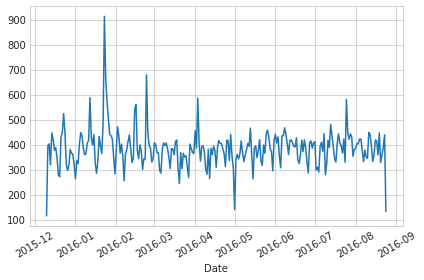

In [62]:
byDate = df.groupby('Date').count()['lat'].plot()
plt.xticks(rotation=30)
plt.tight_layout()

** Now we can use [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) again to pair the time data with the 'Department' activity from before to plot the instances of 911 calls.**

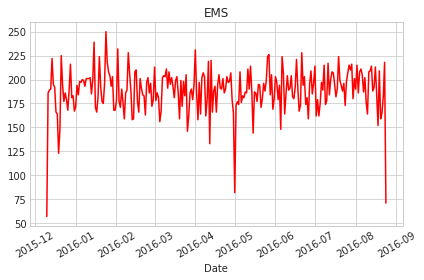

In [72]:
df[df['Department']=='EMS'].groupby('Date').count()['lat'].plot(color='red')
plt.title('EMS')
plt.xticks(rotation=30)
plt.tight_layout()

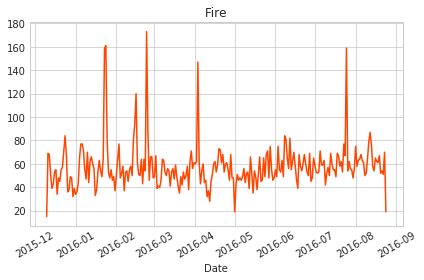

In [78]:
df[df['Department']=='Fire'].groupby('Date').count()['lat'].plot(color = 'orangered')
plt.title('Fire')
plt.xticks(rotation=30)
plt.tight_layout()

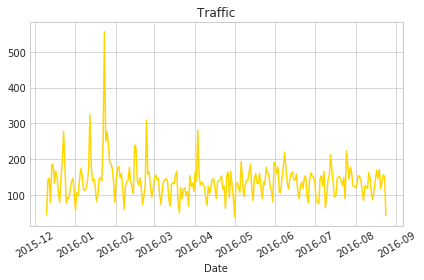

In [77]:
df[df['Department']=='Traffic'].groupby('Date').count()['lat'].plot(color = 'gold')
plt.title('Traffic')
plt.xticks(rotation=30)
plt.tight_layout()

____
** Using seaborn and heatmaps we can look for correlations in our data. First the data needs to be restructured so that the columns become the 'hours' and the index becomes the 'days of the week'. For this I used the  [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. **

In [104]:
dayHour = df.groupby(by=['Day','Hour']).count()['Department'].unstack()
dayHour.head(7)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** HeatMap using restructured dataFrame. **

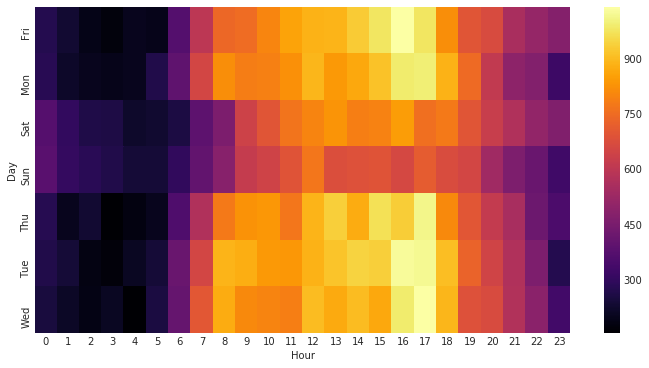

In [98]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='inferno')

** Clustermap using dataFrame. **

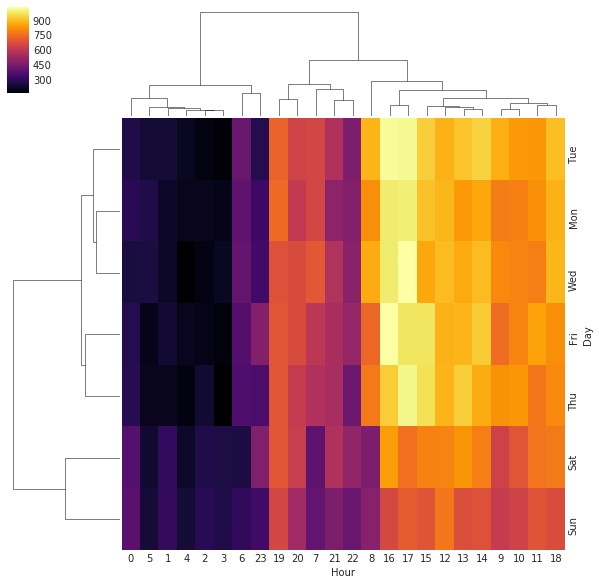

In [99]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='inferno')

** New DataFrame with the month as the column. **

In [100]:
dayMonth = df.groupby(by=['Day','Month']).count()['Department'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


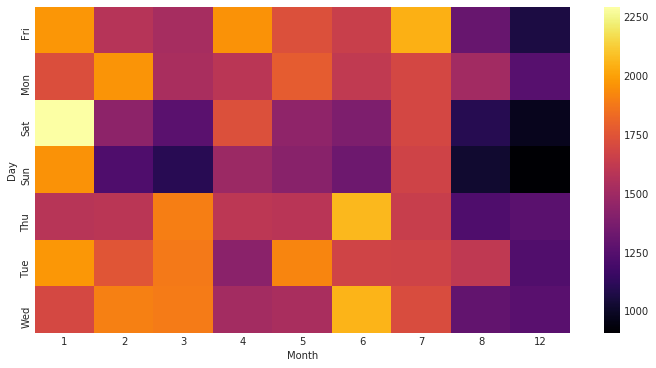

In [102]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='inferno')

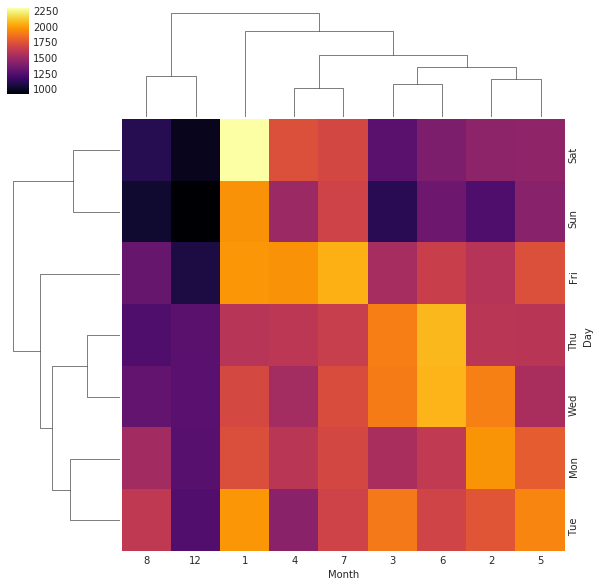

In [103]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='inferno')

## Conclusion
 _____
** Using various data analysis and visualization packages turning data into information becomes a simple and repeatable process. These processes allow us to unlock insights and gain better understandings of abstract sets of data. Pandas and NumPy allow for the transformation and organization of data. These tools make shiftng and restructuring thousands of rows of data simple. MatPlotLib and Seaborn possess the power to bring data to life. Data visualization tools literally illustrate raw data! **